## Import Library

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

## Import dataset

In [3]:
dataset = pd.read_csv(r'C:\Users\Mahira\Desktop\daboot\python\Ders 11\homework.csv')

In [4]:
dataset.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


<function matplotlib.pyplot.show(close=None, block=None)>

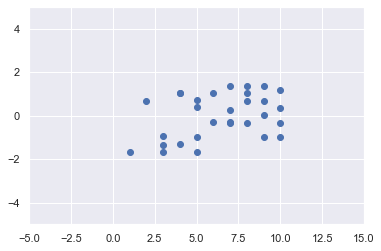

In [5]:
plt.scatter(dataset['Satisfaction'],dataset['Loyalty'])
# Set limits of the axes
plt.xlim(-5,15)
plt.ylim(-5,5)
plt.show

In [41]:
inputs = dataset.iloc[:, 0:2].values
inputs

array([[ 4.  , -1.33],
       [ 6.  , -0.28],
       [ 5.  , -0.99],
       [ 7.  , -0.29],
       [ 4.  ,  1.06],
       [ 1.  , -1.66],
       [10.  , -0.97],
       [ 8.  , -0.32],
       [ 8.  ,  1.02],
       [ 8.  ,  0.68],
       [10.  , -0.34],
       [ 5.  ,  0.39],
       [ 5.  , -1.69],
       [ 2.  ,  0.67],
       [ 7.  ,  0.27],
       [ 9.  ,  1.36],
       [ 8.  ,  1.38],
       [ 7.  ,  1.36],
       [ 7.  , -0.34],
       [ 9.  ,  0.67],
       [10.  ,  1.18],
       [ 3.  , -1.69],
       [ 4.  ,  1.04],
       [ 3.  , -0.96],
       [ 6.  ,  1.03],
       [ 9.  , -0.99],
       [10.  ,  0.37],
       [ 9.  ,  0.03],
       [ 3.  , -1.36],
       [ 5.  ,  0.73]])

## Clustering

In [62]:
from sklearn.cluster import KMeans
kmeans = KMeans(2)

In [63]:
kmeans.fit(inputs)

KMeans(n_clusters=2)

In [64]:
clusters = kmeans.fit_predict(inputs)
clusters

array([1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1])

In [65]:
data_clusters = dataset.copy()
data_clusters['clusters'] = clusters
data_clusters

,Satisfaction,Loyalty,clusters
0,4,-1.33,1
1,6,-0.28,1
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,1
5,1,-1.66,1
6,10,-0.97,0
7,8,-0.32,0
8,8,1.02,0
9,8,0.68,0


In [79]:
# Standartization - Scaling
from sklearn import preprocessing
inputs = preprocessing.scale(inputs)
inputs

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

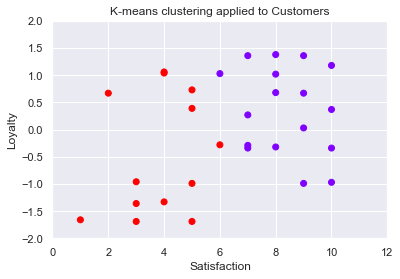

In [80]:
plt.scatter(data_clusters['Satisfaction'],data_clusters['Loyalty'],c=data_clusters['clusters'],cmap='rainbow')
plt.xlim(0,12)
plt.ylim(-2,2)
plt.title("K-means clustering applied to Customers")
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

## WCSS 

In [81]:
kmeans.inertia_

35.07049861111111

In [82]:
wcss=[]
# Create all possible cluster solutions with a loop
for i in range(1,9):
    kmeans = KMeans(i)
    kmeans.fit(inputs)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [83]:
wcss

[60.00000000000002,
 29.818973034723157,
 17.913349527387975,
 10.247181805928427,
 7.79269515393719,
 6.549836791599332,
 5.417308168183208,
 4.352037765292865]

Text(0, 0.5, 'WCSS - Within-cluster Sum of Squares')

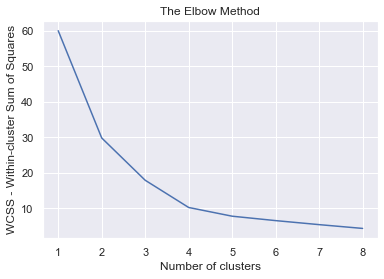

In [84]:
# Create a variable containing the numbers from 1 to 9, so we can use it as X axis of the future plot
number_clusters = range(1,9)
# Plot the number of clusters vs WCSS
plt.plot(number_clusters,wcss)
# Name your graph
plt.title('The Elbow Method')
# Name the x-axis
plt.xlabel('Number of clusters')
# Name the y-axis
plt.ylabel('WCSS - Within-cluster Sum of Squares')

In [88]:
# If not mistaken, as can be seen here, the optimal value is 4 clusters.
# Apply kmeans to the dataset
kmeans = KMeans(n_clusters = 4)
 #predict which cluster each point belongs to
y_kmeans = kmeans.fit_predict(inputs)
data_clusters2 = dataset.copy()
data_clusters2['clusters'] = y_kmeans

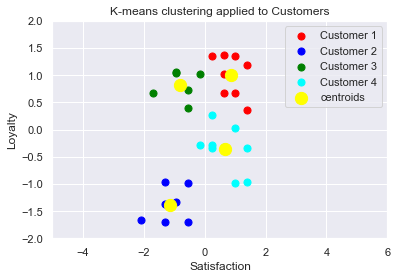

In [89]:
#a = plt.scatter(data_clusters2['Satisfaction'],data_clusters2['Loyalty'],c=data_clusters2['clusters'],cmap='rainbow')
#b= plt.scatter(data_clusters2['Satisfaction'],data_clusters2['Loyalty'],c=data_clusters2['clusters'],cmap='rainbow')

plt.figure(2)
plt.scatter(inputs[y_kmeans == 0, 0], inputs[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Customer 1')
plt.scatter(inputs[y_kmeans == 1, 0], inputs[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Customer 2')
plt.scatter(inputs[y_kmeans == 2, 0], inputs[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Customer 3')
plt.scatter(inputs[y_kmeans == 3, 0], inputs[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'Customer 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 150, c = 'yellow', label = 'centroids' )
plt.xlim(-5,6)
plt.ylim(-2,2)
plt.title("K-means clustering applied to Customers")
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.legend()
plt.show()